

# KPI 1: Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia. La fórmula es la siguiente:

Donde: KPI = ((Nuevo Acceso /Acceso Actual )/Acceso Actual) * 100

"Nuevo acceso" se refiere al número de hogares con acceso a Internet después del próximo trimestre.

"Acceso actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.

In [16]:
#Importamos librerias para acceder a los documentos, y luego graficar nuestros Kpi

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')


In [17]:
# Leemos nuestro archivo csv. 
df= pd.read_csv('/Users/pabloclementi/Desktop/Proyecto2/data/internet_final.csv')

In [18]:
df.columns 

Index(['id', 'Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares',
       'Accesos por cada 100 hab', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total_acceso_teconologia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total_acceso_velocidad', 'Banda ancha fija', 'Dial up', 'Total',
       'Mbps (Media de bajada)'],
      dtype='object')

In [19]:
columnas = ['id','Provincia','Año','Trimestre','Accesos por cada 100 hogares']

In [20]:
#Construimos nuestro df para calcular el kpi 
df_kpi = df[columnas]

In [21]:
df_kpi.loc[:, 'acceso_actual'] = df_kpi['Accesos por cada 100 hogares']

In [22]:
import pandas as pd

# Ordenar el DataFrame por provincia, año y trimestre 
df_kpi.sort_values(by=['Provincia', 'Año', 'Trimestre'], inplace=True)

# Definir nuevo_acceso dentro de cada grupo de provincia
df_kpi['nuevo_acceso'] = df_kpi.groupby('Provincia')['acceso_actual'].shift(-1)

# Calcular el KPI por provincia
df_kpi['KPI'] = ((df_kpi['nuevo_acceso'] - df_kpi['acceso_actual']) / df_kpi['acceso_actual']) * 100

# Redondear los valores de KPI a dos decimales
df_kpi['KPI'] = df_kpi['KPI'].round(2)

# Eliminar filas con NaN en nuevo_acceso si es necesario
df_kpi.dropna(subset=['nuevo_acceso'], inplace=True)

# Mostrar el resultado final
df_kpi.to_csv('/Users/pabloclementi/Desktop/Proyecto2/data/df_kpi.csv')

In [23]:
## Estadísticas descriptivas del KPI
print(df_kpi['KPI'].describe())

count    936.000000
mean       2.572575
std       13.833417
min      -31.600000
25%       -0.120000
50%        0.860000
75%        2.352500
max      245.560000
Name: KPI, dtype: float64


Observamos que en promedio el kpi esta cumplido, pasaremos a ver la visualización

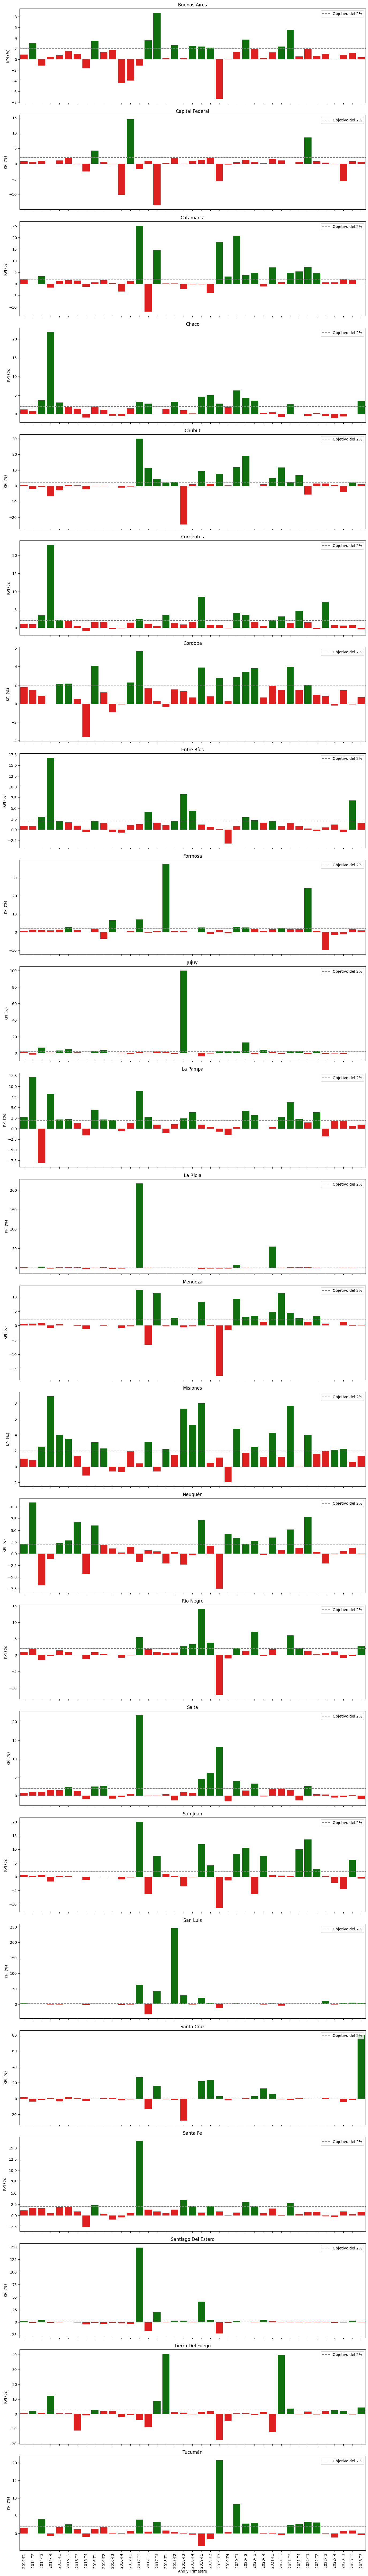

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agregar una columna para indicar si se cumplió el objetivo del KPI (2%)
df_kpi['cumplido'] = df_kpi['KPI'] >= 2

# Crear una nueva columna combinada de Año y Trimestre para el eje x
df_kpi['Año_Trimestre'] = df_kpi['Año'].astype(str) + '-T' + df_kpi['Trimestre'].astype(str)

# Obtener la lista de provincias
provincias = df_kpi['Provincia'].unique()

# Configurar el tamaño de la figura y el número de subplots
fig, axes = plt.subplots(nrows=len(provincias), ncols=1, figsize=(14, len(provincias) * 4), sharex=True)

# Crear subplots para cada provincia
for i, provincia in enumerate(provincias):
    ax = axes[i]
    data = df_kpi[df_kpi['Provincia'] == provincia]
    sns.barplot(x='Año_Trimestre', y='KPI', data=data, ax=ax, palette=['green' if val else 'red' for val in data['cumplido']])
    ax.axhline(2, color='gray', linestyle='--', label='Objetivo del 2%')
    ax.set_title(provincia)
    ax.set_xlabel('Año y Trimestre')
    ax.set_ylabel('KPI (%)')
    ax.legend(loc='upper right')

# Ajustar la disposición de los subplots
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

### Resumen del Último Trimestre

En el último trimestre analizado, **19 de las 24 provincias no cumplieron el objetivo** de crecimiento del 2% en el acceso a Internet por cada 100 hogares. Esto implica que solo 5 provincias lograron alcanzar o superar el objetivo del 2% de crecimiento.

### Detalles 

Para calcular el porcentaje de cumplimiento en el último trimestre:

1. **Número total de provincias**: 24
2. **Número de provincias que cumplieron el objetivo**: 5
3. **Número de provincias que no cumplieron el objetivo**: 19

### Explicación

En el último trimestre:

- **Proporción de provincias que cumplieron el objetivo**: 20.83% - (provincias que cumplieron el objetivo / total) *100
- **Proporción de provincias que no cumplieron el objetivo**: 79.17% (provincias que cumplieron el objetivo/total ) *100

Explicación del Desempeño

La baja proporción de provincias que alcanzaron el objetivo del 2% de crecimiento en el acceso a Internet sugiere varios posibles problemas:

1.	Inadecuada Infraestructura: Puede haber deficiencias en la infraestructura de telecomunicaciones en las provincias que no cumplieron con el objetivo, lo que limita el crecimiento del acceso a Internet.
2.	Problemas Regionales: Factores locales, como dificultades económicas o barreras geográficas, podrían estar afectando la capacidad de algunas provincias para mejorar su acceso a Internet.
3.	Estrategias Inadecuadas: Las estrategias actuales de expansión y promoción pueden no estar alineadas con las necesidades y características específicas de cada provincia.


### Conclusion
Se recomienda un análisis adicional para identificar las causas de este bajo cumplimiento y para definir estrategias que puedan mejorar el rendimiento en los próximos trimestres.
Tambien se podria revisar y entrar en profundidad en el año 2019 T1, en el cual 15 de las 24 provincias cumplieron su objetivo, en el cual 
algunas han superado ampliamente el objetivo y apoyarse en ese analisis para cumplir los objetivos para los trimestres venideros. 

# KPI 2 LLegar a un 65% promedio de conexiones por cada 100 hogares , por año y por provincia. 




Promedio Accesos{p,a} = Σt = Accesos por cada 100 hogares(p,a,t) / 4 

"Promedio Accesos{p,a}" se refiere al promedio de conexiones por cada 100 hogares en el año y en la provincia p.

p = Provincia 

t = Trimestre 

a= Año 

Comparamos el objetivo. 
Para ello, realizamos los siguientes pasos:

Cumplido p,a True si Promedio Acceso{p,a} ≥ 65 

Cumplido p,a False si Promedio Acceso{p,a} < 65

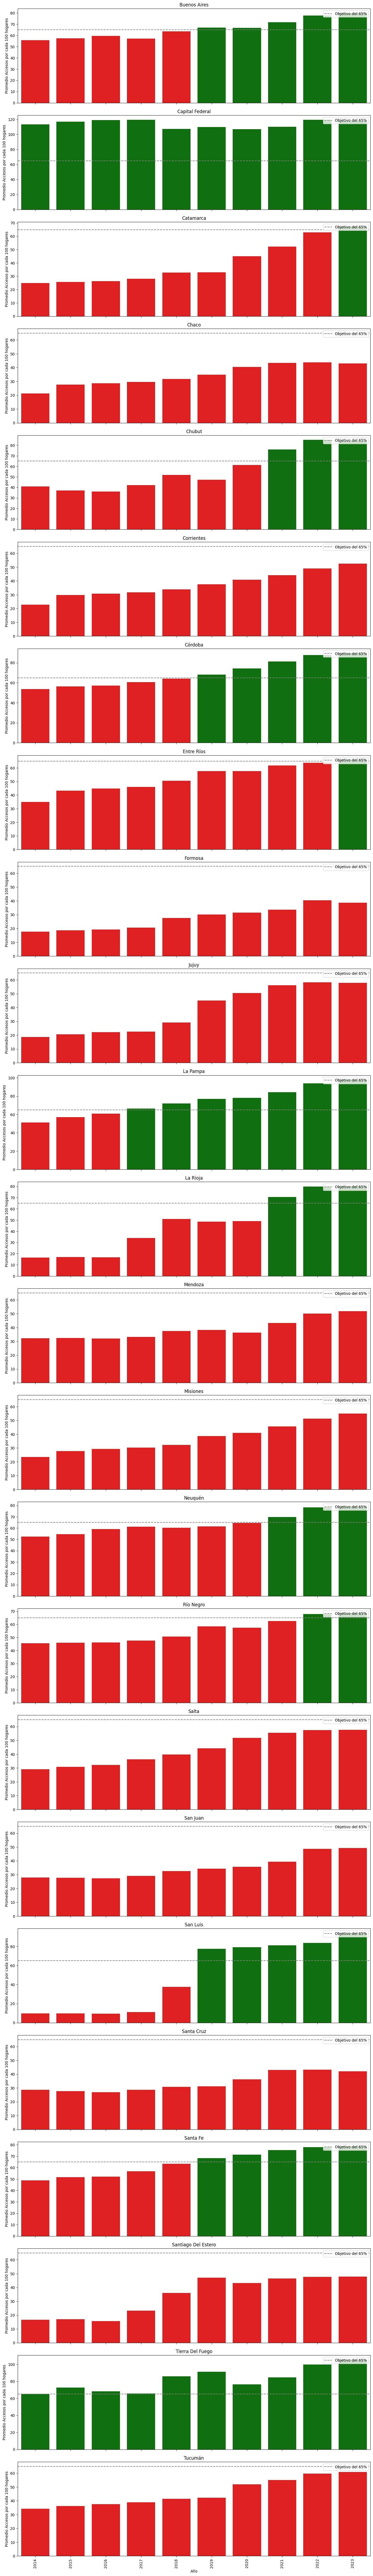

In [25]:

# Paso 1: Calcular el promedio de conexiones por cada 100 hogares por año y provincia
df_avg = df_kpi.groupby(['Provincia', 'Año'])['Accesos por cada 100 hogares'].mean().reset_index()
df_avg.rename(columns={'Accesos por cada 100 hogares': 'Promedio Accesos'}, inplace=True)

# Paso 2: Comparar el promedio con el objetivo y crear una nueva columna para indicar si se cumple el objetivo
df_avg['cumplido'] = df_avg['Promedio Accesos'] >= 65

# Paso 3: Visualizar los resultados con un gráfico de barras
provincias = df_avg['Provincia'].unique()

fig, axes = plt.subplots(nrows=len(provincias), ncols=1, figsize=(14, len(provincias) * 4), sharex=True)

for i, provincia in enumerate(provincias):
    ax = axes[i]
    data = df_avg[df_avg['Provincia'] == provincia]
    sns.barplot(x='Año', y='Promedio Accesos', data=data, ax=ax, palette=['green' if val else 'red' for val in data['cumplido']])
    ax.axhline(65, color='gray', linestyle='--', label='Objetivo del 65%')
    ax.set_title(provincia)
    ax.set_xlabel('Año')
    ax.set_ylabel('Promedio Accesos por cada 100 hogares')
    ax.legend(loc='upper right')

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [26]:
df_avg.head(10)


,Provincia,Año,Promedio Accesos,cumplido
0,Buenos Aires,2014,55.620141,False
1,Buenos Aires,2015,57.288448,False
2,Buenos Aires,2016,59.513579,False
3,Buenos Aires,2017,57.021286,False
4,Buenos Aires,2018,63.612973,False
5,Buenos Aires,2019,66.924512,True
6,Buenos Aires,2020,66.544856,True
7,Buenos Aires,2021,71.613710,True
8,Buenos Aires,2022,77.677037,True
9,Buenos Aires,2023,79.770000,True


In [27]:
df_avg.describe()

,Año,Promedio Accesos
count,240.000000,240.000000
mean,2018.500000,51.597013
std,2.878284,23.672808
min,2014.000000,9.615326
25%,2016.000000,33.096251
50%,2018.500000,48.581788
75%,2021.000000,64.632708
max,2023.000000,119.529466


In [28]:
df_avg.to_csv('/Users/pabloclementi/Desktop/Proyecto2/data/df_avg.csv')


### Resumen del Análisis

El KPI 2 mide el porcentaje de provincias que alcanzan un promedio de conexiones por cada 100 hogares igual o superior al 65%, tanto a nivel anual como por provincia.

### Observaciones

1. **Tendencia General**:
   - **La tendencia en la gran mayoría de las provincias es hacia la alza**, lo que indica un crecimiento positivo en la conexión por cada 100 hogares a lo largo del tiempo. Este aumento es un signo alentador de la mejora en la infraestructura y el acceso a Internet en varias regiones.

2. **Provincias que No Alcanzaron el Objetivo**:
   - **En el último año**, **11 de las 24 provincias no alcanzaron el objetivo del 65% de conexiones por cada 100 hogares**. Este resultado sugiere que, a pesar del crecimiento general, existen provincias que todavía enfrentan desafíos significativos en mejorar su conectividad.
   - **Tendencia en Años Anteriores**:
     - En los años anteriores, estas mismas 11 provincias también tuvieron dificultades para alcanzar el objetivo del 65%. Esto puede indicar problemas persistentes en infraestructura, recursos o políticas que afectan la conectividad en estas regiones.

### Recomendaciones para Provincias que No Alcanzaron el Objetivo

1. **Investigación de Causas**:
   - **Realizar un análisis detallado** de las provincias que no cumplieron el objetivo para identificar las causas subyacentes. Esto puede incluir la evaluación de la infraestructura existente, los presupuestos asignados, y la disponibilidad de tecnología en esas áreas.

2. **Desarrollo de Estrategias Específicas**:
   - **Diseñar e implementar estrategias personalizadas** para estas provincias. Esto puede incluir inversiones adicionales en infraestructura, programas de subsidios para mejorar la conectividad, o iniciativas para fomentar la adopción de nuevas tecnologías.

3. **Monitoreo y Evaluación Continua**:
   - **Establecer un sistema de monitoreo continuo** para seguir el progreso de estas provincias y ajustar las estrategias según sea necesario. Evaluar periódicamente el impacto de las intervenciones y realizar ajustes basados en los resultados.

4. **Colaboración con Actores Locales**:
   - **Colaborar con autoridades locales y proveedores de servicios** para identificar barreras específicas y trabajar juntos en soluciones que sean viables y efectivas a nivel local.

5. **Imitar politicas,estrategias,campañas,etc de provincias con objetivo cumplido**:
   - **Investigue las estrategias, políticas y programas implementados en estas provincias.** Esto puede incluir iniciativas de infraestructura, subsidios gubernamentales, asociaciones públicas y privadas, y programas de educación.

### Conclusión

Aunque la tendencia general es positiva y muchas provincias están avanzando en la mejora de la conectividad, es crucial abordar los desafíos persistentes en las 11 provincias que no han alcanzado el objetivo. A través de un enfoque dirigido y estrategias adaptadas, se puede trabajar para asegurar que todas las provincias cumplan con el objetivo de un promedio de conexiones por cada 100 hogares igual o superior al 65%.

# KPI 3 Distribución equitativa de la conectividad (medir las disparidades entre provincias).

Descripción: Este KPI mide la equidad en la distribución de la conectividad a Internet entre provincias. Se calcula utilizando el Coeficiente de Variación (CV) de los accesos a Internet por cada 100 hogares, y el objetivo es mantener este CV por debajo del 20%.
Un coeficiente de variación más bajo indica una distribución más equitativa de la conectividad entre las provincias.

~	Media (µ): La media de los accesos por cada 100 hogares.

~	Desviación estándar (σ): La desviación estándar de los accesos por cada 100 hogares.

~	Coeficiente de variación (CV): (σ)/(µ)  * 100

Formula = CV = (Desivación Estandar / Media ) * 100 

Objetivo < 15 % 





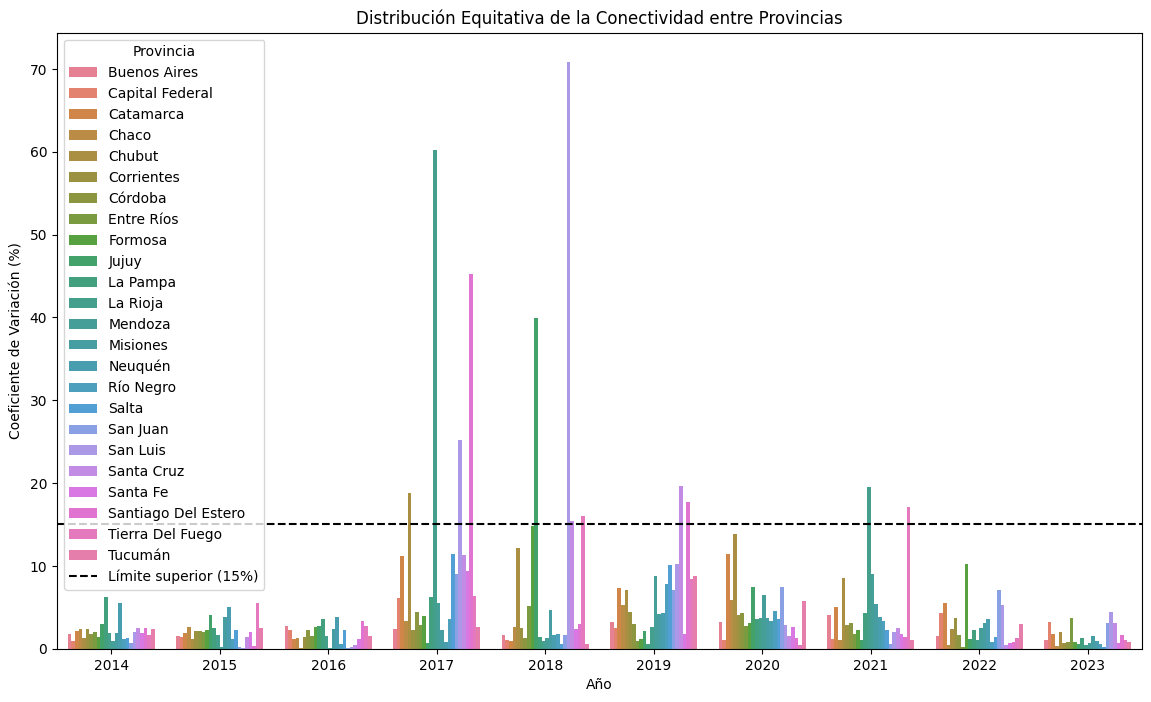

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular la media y desviación estándar por provincia y año
df_kpi_grouped = df_kpi.groupby(['Provincia', 'Año'])['Accesos por cada 100 hogares'].agg(['mean', 'std']).reset_index()

# Calcular el coeficiente de variación (CV)
df_kpi_grouped['CV'] = (df_kpi_grouped['std'] / df_kpi_grouped['mean']) * 100

# Visualización del coeficiente de variación por provincia y año
plt.figure(figsize=(14, 8))
sns.barplot(data=df_kpi_grouped, x='Año', y='CV', hue='Provincia')
plt.axhline(y=15, color='black', linestyle='--', label='Límite superior (15%)')
plt.title('Distribución Equitativa de la Conectividad entre Provincias')
plt.xlabel('Año')
plt.ylabel('Coeficiente de Variación (%)')
plt.legend(title='Provincia')
plt.show()

In [30]:
df_kpi_grouped.describe()

,Año,mean,std,CV
count,240.000000,240.000000,240.000000,240.000000
mean,2018.500000,51.597013,2.090083,4.442133
std,2.878284,23.672808,3.043664,7.727837
min,2014.000000,9.615326,0.004740,0.048818
25%,2016.000000,33.096251,0.536122,1.286697
50%,2018.500000,48.581788,1.122184,2.352667
75%,2021.000000,64.632708,2.529303,4.299948
max,2023.000000,119.529466,26.600217,70.838146


In [32]:
df_kpi_grouped.to_csv('/Users/pabloclementi/Desktop/Proyecto2/data/df_kpi_grouped.csv')

### ¿Por qué un 15%?

El 15% es un ejemplo de un valor de referencia que podrías considerar como un límite razonable para la variación aceptable:

CV < 15%: Indica que la distribución de la conectividad es relativamente equitativa entre las provincias. La variabilidad en el acceso a Internet es baja, lo que sugiere que las provincias tienen un acceso más uniforme.

CV > 15%: Indica que hay una mayor disparidad en el acceso a Internet entre las provincias. Esto sugiere que algunas provincias pueden tener significativamente más o menos acceso a Internet en comparación con otras. 


“El Coeficiente de Variación (CV) para el acceso a Internet por cada 100 hogares se encuentra por debajo del 15% en todas las provincias. En los ultimos dos años. Esto indica una distribución equitativa de la conectividad a Internet en el país, con poca variabilidad en los niveles de acceso entre las distintas provincias. Las políticas actuales están siendo efectivas para mantener una alta equidad en la distribución de los servicios de Internet.” 

### Conclusion
Continuar monitoreando el CV para asegurar que la equidad se mantenga. Si el CV sigue siendo bajo, se puede considerar la posibilidad de ajustar el objetivo para buscar una equidad aún mayor o mejorar otros aspectos relacionados con la conectividad.
